In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
sns.set_style('darkgrid')
%matplotlib inline

In [63]:
df=pd.read_csv(r"Data/weatherAUS.csv")

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [65]:
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

# EDA

<Axes: xlabel='Temp3pm', ylabel='Count'>

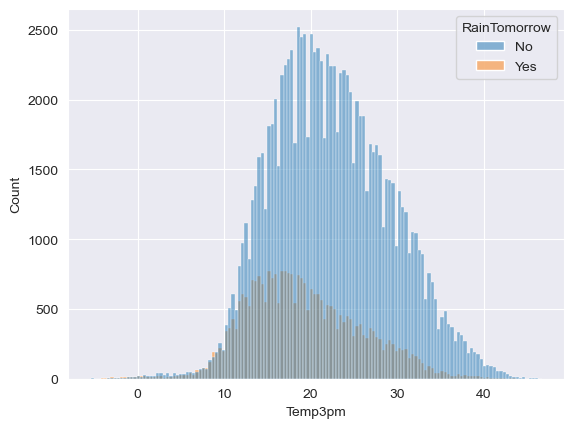

In [66]:
sns.histplot(data=df, x='Temp3pm', hue='RainTomorrow')

<Axes: xlabel='Temp9am', ylabel='Count'>

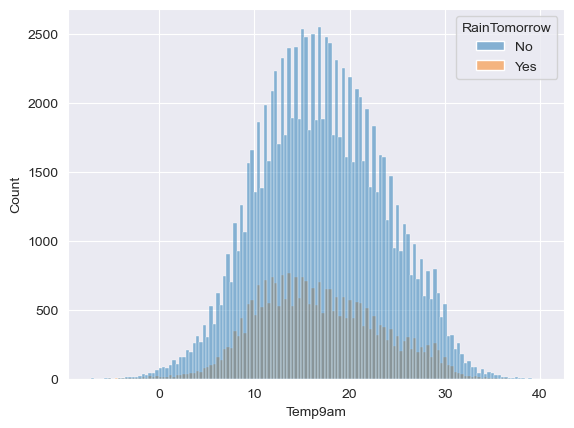

In [67]:
sns.histplot(data=df, x='Temp9am', hue="RainTomorrow")

In [68]:
df.groupby(['RainTomorrow']).agg('count')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
RainTomorrow,,,,,,,,,,,,,,,,,,,,,
No,109586,109586,109225,109326,109586,63372,57406,102819,102853,101719,...,107693,108502,106995,98850,98847,67778,64657,109130,107652,109586
Yes,31201,31201,31094,31154,31201,17721,16576,28805,28829,29408,...,30563,30768,30291,28194,28171,20384,20036,31001,30511,31201


<Axes: xlabel='RainTomorrow', ylabel='Count'>

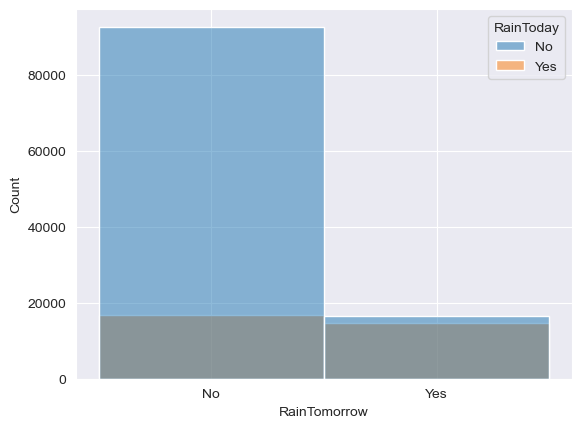

In [69]:
sns.histplot(data=df, x='RainTomorrow', hue='RainToday')

<Axes: xlabel='MinTemp', ylabel='MaxTemp'>

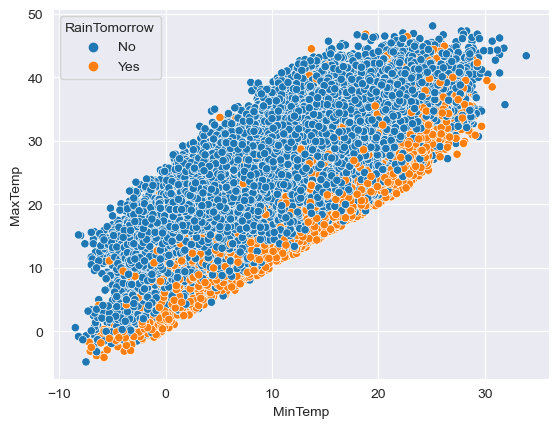

In [70]:
sns.scatterplot(data=df, x='MinTemp', y='MaxTemp', hue='RainTomorrow')

# Splitting up the data and Null imputation

In [71]:
df['year']=pd.to_datetime(df["Date"]).dt.year

<Axes: xlabel='year', ylabel='count'>

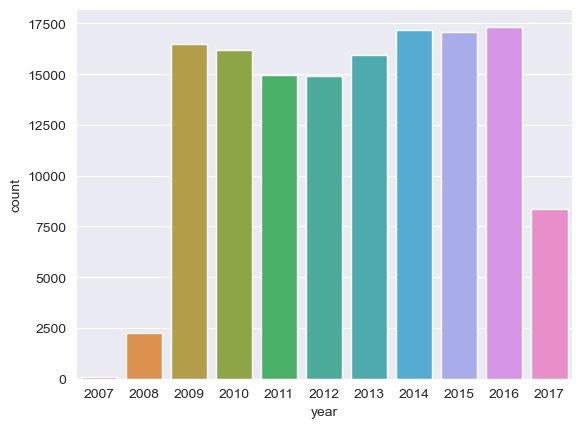

In [72]:
sns.countplot(df, x=df.year)

In [73]:
#Using years till 2014 for training, 2015 for validation and 2016 and 2017 for test.
df_train = df[df['year']<2015]
df_val = df[df['year']==2015]
df_test = df[df['year']>2015]

In [74]:
input_cols=df_train.columns.to_list()[1:-2]
target_col='RainTomorrow'

In [75]:
#seperating input columns and target cols
df_train_input=df_train[input_cols]
df_val_input=df_val[input_cols]
df_test_input=df_test[input_cols]

##########################################

df_train_target=df_train[target_col]
df_val_target=df_val[target_col]
df_test_target=df_test[target_col]

In [76]:
# Identifying numerical and categorical columns
numerical_col =  df_train_input.select_dtypes(include=np.number).columns.to_list()
categorical_col = df_train_input.select_dtypes(include='object').columns.to_list()


In [77]:
df_train_input[numerical_col].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,97674.000000,97801.000000,97988.000000,61657.000000,57942.000000,91160.000000,97114.000000,96919.000000,96936.000000,96872.000000,88876.000000,88857.000000,63000.000000,61966.000000,97414.000000,97392.000000
mean,12.007831,23.022202,2.372935,5.289991,7.609004,40.215873,14.092263,18.764608,68.628745,51.469547,1017.513734,1015.132352,4.302952,4.410677,16.835126,21.540138
std,6.347175,6.984397,8.518819,3.952010,3.788813,13.697967,8.984203,8.872398,19.003097,20.756113,7.072510,6.997072,2.866634,2.693370,6.404586,6.831612
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-5.900000,-5.100000
25%,7.500000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.800000,1010.400000,1.000000,2.000000,12.200000,16.600000
50%,11.800000,22.400000,0.000000,4.600000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.500000,1015.100000,5.000000,5.000000,16.600000,20.900000
75%,16.600000,27.900000,0.800000,7.200000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.300000,1019.900000,7.000000,7.000000,21.400000,26.200000
max,33.900000,48.100000,371.000000,82.400000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.100000


In [78]:
df_train_input[categorical_col].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [79]:
# for null imputation
imputer = SimpleImputer(strategy = 'mean') 


In [80]:
imputer.fit(df[numerical_col])

SimpleImputer()

In [81]:
df_train_input[numerical_col]=imputer.transform(df_train_input[numerical_col])
df_val_input[numerical_col]=imputer.transform(df_val_input[numerical_col])
df_test_input[numerical_col]=imputer.transform(df_test_input[numerical_col])

# Scaling the features

### Scaling the values in range of (0, 1) using a built in pre processing feature

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

scaler.fit(df[numerical_col])

MinMaxScaler()

In [83]:
df_train_input[numerical_col]=scaler.transform(df_train_input[numerical_col])
df_val_input[numerical_col]=scaler.transform(df_val_input[numerical_col])
df_test_input[numerical_col]=scaler.transform(df_test_input[numerical_col])

# Encoding the categorical columns

In [84]:
from sklearn.preprocessing import OneHotEncoder

encoder =OneHotEncoder(sparse=False, handle_unknown='ignore')

encoder.fit(df[categorical_col])

OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [85]:
# to see the encoded cols i can uses the encoder.get_feature_names()

encoded_cols = list(encoder.get_feature_names_out(categorical_col))

In [87]:
df_train_input[encoded_cols]=encoder.transform(df_train_input[categorical_col])
df_val_input[encoded_cols]=encoder.transform(df_val_input[categorical_col])
df_test_input[encoded_cols]=encoder.transform(df_test_input[categorical_col])

# Training the model

In [88]:
from sklearn.linear_model import LogisticRegression
#can try othe solvers based on interests
model = LogisticRegression(solver="liblinear")

In [89]:
model.fit(df_train_input[numerical_col+encoded_cols], df_train_target)

LogisticRegression(solver='liblinear')

In [90]:
print(model.coef_.tolist())
#higher the weight assigned to the feature higher it will impact the result.

[[0.8986285224781534, -2.8799124121235895, 3.1627783028636385, 0.8542497171448804, -1.6713937457670125, 6.764407853792629, -0.9423258072434708, -1.4284311984063527, 0.32288806417644333, 5.995311620621334, 5.463858005244598, -9.176805965616758, -0.16229419697537226, 1.287660411155043, 0.4747176447814608, 2.0214244414462517, 0.6016489835124073, -0.5524850100353715, 0.4781416956020443, 0.007671387287999868, 0.3468137661389925, -0.3522756036890973, 0.1797097129842413, 0.4404853218790967, -0.013982537029835505, 0.028944042438899337, 0.2581483847766936, -0.02120413161687626, -0.04279695571171802, -0.4831424678504666, -0.13756207029663933, -0.5760574442217243, -0.7875282271883758, -0.255405489696298, -0.32888181902407476, -0.5690022756512245, 0.08183021727917843, 0.013381469663491768, 0.06412811273743171, -0.9020536353362058, -0.4443316738205024, 0.008515308637273216, -0.46061253939668223, -0.4655171584422811, -0.06949758372925448, 0.19115958207235792, 0.4504746185301206, 0.6081210531856072, 

# making predictions

In [91]:
x_train = df_train_input[numerical_col+encoded_cols]
x_val = df_val_input[numerical_col+encoded_cols]
x_test = df_test_input[numerical_col+encoded_cols]

In [92]:
train_preds =  model.predict(x_train)

In [95]:
#now testing the accuracy score.
from sklearn.metrics import accuracy_score
accuracy_score(df_train_target, train_preds)

0.8519206433440829